<a href="https://colab.research.google.com/github/around-star/Shakespeare/blob/master/Shakespeare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 
import os

In [3]:
from google.colab import drive
drive.mount('/gdrive')
os.chdir('/gdrive/My Drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [4]:
data = open('Shakespeare.txt').read()

corpus = data.lower().split("\n")

tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           1263300   
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 15, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 6316)              637916    
_________________________________________________________________
dense_1 (Dense)              (None, 12633)             79802661  
Total params: 82,165,477
Trainable params: 82,165,477
Non-trainable params: 0
____________________________________________

In [6]:
 history = model.fit(predictors, label, epochs=50, verbose=2)

Epoch 1/50
5354/5354 - 189s - loss: 6.8177 - accuracy: 0.0377
Epoch 2/50
5354/5354 - 191s - loss: 6.3682 - accuracy: 0.0629
Epoch 3/50
5354/5354 - 191s - loss: 6.1257 - accuracy: 0.0813
Epoch 4/50
5354/5354 - 191s - loss: 5.9592 - accuracy: 0.0902
Epoch 5/50
5354/5354 - 190s - loss: 5.8235 - accuracy: 0.0971
Epoch 6/50
5354/5354 - 188s - loss: 5.7101 - accuracy: 0.1023
Epoch 7/50
5354/5354 - 189s - loss: 5.6175 - accuracy: 0.1079
Epoch 8/50
5354/5354 - 192s - loss: 5.5371 - accuracy: 0.1122
Epoch 9/50
5354/5354 - 189s - loss: 5.4638 - accuracy: 0.1157
Epoch 10/50
5354/5354 - 190s - loss: 5.3966 - accuracy: 0.1189
Epoch 11/50
5354/5354 - 188s - loss: 5.3334 - accuracy: 0.1225
Epoch 12/50
5354/5354 - 190s - loss: 5.2756 - accuracy: 0.1259
Epoch 13/50
5354/5354 - 189s - loss: 5.2199 - accuracy: 0.1296
Epoch 14/50
5354/5354 - 190s - loss: 5.1660 - accuracy: 0.1332
Epoch 15/50
5354/5354 - 190s - loss: 5.1166 - accuracy: 0.1366
Epoch 16/50
5354/5354 - 190s - loss: 5.0689 - accuracy: 0.1403
E

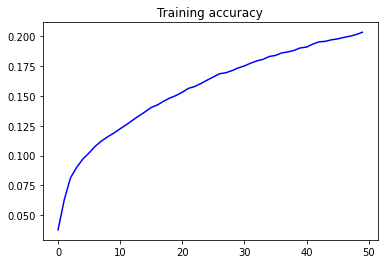

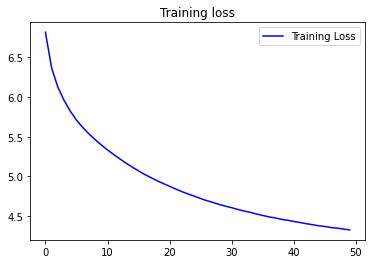

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [9]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope and all the people with it and i will not speak it to you and i am a man to do me speak you not to be so much shoes than you sir that i have heard you are a man a man to do not you not go on me come you sir i am a man like me i am a man of it that is no more than you are to be admitted to the king of france at the duke of norfolk that is not dead and much less well a man to be a man
